# Training

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Cost functions

#### Binary Crossentropy

Cost function for logistic regression

$$ loss(f_w(x^{(i)}),y^{(i)}) = - y^{(i)}\log(f_w(x^{(i)})) - (1-y^{(i)})\log(1-f_w(x^{(i)})) $$

#### MSE

$$ loss(f_w(x^{(i)}),y^{(i)}) = \frac{1}{2m} \sum_{i=0}^{m-1} (w \cdot x^{(i)}_j+b-y^{(i)}_j)^2  $$

#### Multiclass Crossentropy

Cost function for Softmax 

$$ loss(a_i) = - log(a_i) $$
$$ a_i=\dfrac {e^{-(z_i)}}{\sum_{k=0}^{m-1}e^{-(z_k)}} $$

a_i is probability for i class so the closer to 1, the smaller loss (it the true class is i, for others same pattern with 0)

## Activation functions

#### Linear

good for predicting positive/negative number

$$ y_j = w_0+w_1x_1+w_2x_2+...+w_jx_j $$

#### Sigmoid

good for binary classification

$$ y_j = \dfrac {1}{1+e^{-(w_0+w_1x_1+w_2x_2+...+w_jx_j)}} $$

#### ReLu

good if y can only take non negative values

$$ y_j = max(0,{(w_0+w_1x_1+w_2x_2+...+w_jx_j)}) $$

#### Softmax

good for last layer to give probabilities of many classes

$$ y_j = \dfrac  {e^{-(z_j)}}{\sum_{k=0}^{m-1}e^{-(z_k)}} $$
$$ z_j = w_0+w_1x_1+w_2x_2+...+w_jx_j $$  

Softmax for 2 classes is equal to esigmoid function.

# ReLu

In [2]:
w1,b1=-2,2
w2,b2=1,-1
w3,b3=2,-4

(0.0, 3.0)

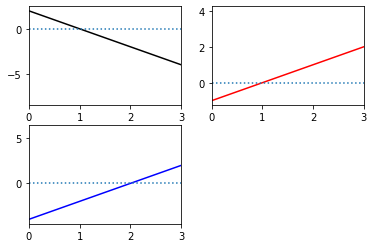

In [30]:
x=np.arange(0,6)
y=x*0
y1=w1*x+b1
y2=w2*x+b2
y3=w3*x+b3
plt.subplot(221)
plt.plot(x,y1,c='k',label='y1')
plt.plot(x,y,linestyle=':')
plt.xlim(0,3)
plt.subplot(222)
plt.plot(x,y2,c='r',label='y2')
plt.plot(x,y,linestyle=':')
plt.xlim(0,3)
plt.subplot(223)
plt.plot(x,y3,c='b',label='y3')
plt.plot(x,y,linestyle=':')
plt.xlim(0,3)

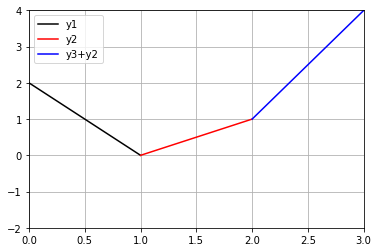

In [21]:
x=np.arange(0,6)
y1=w1*x[0:2]+b1
y2=w2*x[1:3]+b2
y22=w2*x[2:4]+b2
y3=w3*x[2:4]+b3
plt.plot(x[0:2],y1,c='k',label='y1')
plt.plot(x[1:3],y2,c='r',label='y2')
plt.plot(x[2:4],y3+y22,c='b',label='y3+y2')
plt.xlim(0,3)
plt.ylim(-2,4)
plt.grid()
plt.legend()

In [118]:
 model=tf.keras.models.Sequential(
     [
         tf.keras.layers.Input(shape=(1,)),
         tf.keras.layers.Dense(3,activation='relu',name='layer1'),
         tf.keras.layers.Dense(1,activation='linear',name='layer2')
     ]
 
 )

In [119]:
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.2)
)

In [120]:
x=np.arange(0,4)
y=np.array([2,0,1,4])

In [121]:
model.fit(x,y,epochs=60)

Epoch 1/60
1/1 [==============================] - 0s 296ms/step - loss: 5.1158
Epoch 2/60
1/1 [==============================] - 0s 3ms/step - loss: 3.4892
Epoch 3/60
1/1 [==============================] - 0s 4ms/step - loss: 2.0980
Epoch 4/60
1/1 [==============================] - 0s 5ms/step - loss: 1.6216
Epoch 5/60
1/1 [==============================] - 0s 6ms/step - loss: 2.4370
Epoch 6/60
1/1 [==============================] - 0s 4ms/step - loss: 2.5242
Epoch 7/60
1/1 [==============================] - 0s 5ms/step - loss: 2.0464
Epoch 8/60
1/1 [==============================] - 0s 5ms/step - loss: 1.6837
Epoch 9/60
1/1 [==============================] - 0s 6ms/step - loss: 1.6300
Epoch 10/60
1/1 [==============================] - 0s 4ms/step - loss: 1.7609
Epoch 11/60
1/1 [==============================] - 0s 4ms/step - loss: 1.9110
Epoch 12/60
1/1 [==============================] - 0s 5ms/step - loss: 1.9937
Epoch 13/60
1/1 [==============================] - 0s 4ms/step - loss: 

In [122]:
w,b=model.get_layer('layer1').get_weights()
print(f'w: {w} \nb: {b}')

w: [[-0.60828704  1.529279   -1.1621584 ]] 
b: [ 0.        -2.9965787 -1.1980411]


1/1 [==============================] - 0s 45ms/step


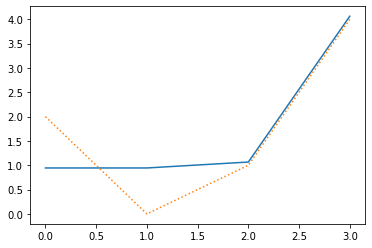

In [123]:
plt.plot(x,model.predict(x))
plt.plot(x,y,linestyle=':')

# Multiclass

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [47]:
(X,Y), (test_X, test_Y) = mnist.load_data()

In [48]:
X_reshaped=X.reshape(60000,784)

In [49]:
 model=tf.keras.models.Sequential(
     [
         tf.keras.layers.Input(shape=(784,)),
         tf.keras.layers.Dense(25,activation='relu',name='layer1'),
         tf.keras.layers.Dense(15,activation='relu',name='layer2'),
         tf.keras.layers.Dense(10,activation='softmax',name='layer3')
     ]
 
 )

In [50]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

In [51]:
model.fit(X_reshaped,Y,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9157
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2816
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9635
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6584
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3938
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2841
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2445
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2221
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2049
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1926
Epoch 11/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1867
Epoch 12/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1759
E

In [52]:
p0=model.predict(X_reshaped[0].reshape(1,784))
p1=model.predict(X_reshaped[1].reshape(1,784))
print(f'true: {Y[0]}, predicted: {p0}')
print(f'true: {Y[1]}, predicted: {p1}')

1/1 [==============================] - 0s 24ms/step
true: 5, predicted: [[1.9277170e-03 9.5318537e-05 1.2348287e-03 3.1969470e-01 1.3244153e-03
  5.6010252e-01 9.7848400e-03 3.5683148e-05 7.9812057e-02 2.5987897e-02]]
true: 0, predicted: [[9.9999988e-01 3.0184937e-25 3.1190582e-15 2.5325766e-30 7.8867801e-10
  4.3073615e-18 2.5754171e-13 5.8000734e-13 9.5594828e-08 7.9139306e-11]]


### Improved implementation

Due to computational reasons it is adviced not ot use `'softmax'` but rather `'linear'` + `from_logits=True` instead

In [36]:
 model=tf.keras.models.Sequential(
     [
         tf.keras.layers.Input(shape=(784,)),
         tf.keras.layers.Dense(25,activation='relu',name='layer1'),
         tf.keras.layers.Dense(15,activation='relu',name='layer2'),
         tf.keras.layers.Dense(10,activation='linear',name='layer3')
     ]
 
 )
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

In [37]:
model.fit(X_reshaped,Y,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.5704
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6527
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5164
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4578
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4093
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3808
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3573
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3355
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3248
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3105
Epoch 11/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3006
Epoch 12/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834
E

For efficiency training data is broken into batches. Default size of batch in TensoeFlow is 32. There are 60000 rows in the dataset which means `1875` batches. Notation `1875/1875` describes which batch is being executed.

So here as we have `'linear'` function at the last layer, the output is z rather than a=exp(-z)/sum(exp(-z_i))

In [38]:
p0=model.predict(X_reshaped[0].reshape(1,784))
p1=model.predict(X_reshaped[1].reshape(1,784))
print(f'true: {Y[0]}, predicted: {p0}')
print(f'true: {Y[1]}, predicted: {p1}')

1/1 [==============================] - 0s 16ms/step
true: 5, predicted: [[ 7.3164344 12.944876  12.918251  17.310467   1.4760929 24.282928
  11.3466835 12.97772   10.354348  14.392653 ]]
true: 0, predicted: [[ 11.445258   -15.49023      1.3439013   -0.9151575    0.50015426
    4.0592866    1.91262     -1.480469    -0.90899396   4.2813535 ]]


#### Softmax

In [30]:
def softmax(z):
    e_z=np.exp(z)
    sm=e_z/np.sum(e_z)
    return sm

In [45]:
softmax(p0[0])

array([4.2766075e-08, 1.1898723e-05, 1.1586105e-05, 9.3638082e-04,
       1.2435732e-10, 9.9897391e-01, 2.4066576e-06, 1.2296020e-05,
       8.9217207e-07, 5.0613024e-05], dtype=float32)

In [46]:
softmax(p1[0])

array([9.9846631e-01, 2.0017035e-12, 4.0960942e-05, 4.2783186e-06,
       1.7617134e-05, 6.1893754e-04, 7.2337134e-05, 2.4308688e-06,
       4.3047698e-06, 7.7283935e-04], dtype=float32)

#### SparseCategoricalCrossentropy

for predictions noncoded like 0-9

#### CategoricalCrossEntropy

for encoded predictions like 2 is [0,0,1,0,0,0,0,0,0,0]

***

# Gradient descent

Adaptive Moment estimation - Adam - automaticlly adjusts the alpha step

`tf.keras.optimizers.Adam(learning_rate=0.001)`

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

# Layer types

`tf.keras.layers.Dense(25,activation='relu',name='layer1')` connects all inputs with all neurons

Convlution layers make connections only to some neurons. They need less training data

Those input batches can overleap like `x1-x20` to the first neuron, `x11-x30` to the second, etc..

# Back propagation

In [2]:
import sympy

In [3]:
J, w = sympy.symbols('J,w')

In [4]:
J=w**2
J

w**2

In [5]:
dJ_dw=sympy.diff(J,w)
dJ_dw

2*w

In [6]:
dJ_dw.subs([(w,2)])

4

In [7]:
J=w**3
J

w**3

In [8]:
dJ_dw=sympy.diff(J,w)
dJ_dw

3*w**2

In [9]:
dJ_dw.subs([(w,2)])

12

#### derivative

In [13]:
J=3**2
J_epsilon=(3+0.001)**2
k=(J_epsilon-J)/0.001
print('J',J,'J_epsilon',J_epsilon,'k',k)

J 9 J_epsilon 9.006001 k 6.000999999999479


In [14]:
J, w = sympy.symbols('J,w')

In [15]:
J=w**2
dJ_dw=sympy.diff(J,w)
dJ_dw.subs([(w,3)])

6

## Practice lab